In [1]:
import cv2
import numpy as np
from skimage import io, exposure, color, transform

# Load the four original images in grayscale mode
image1 = cv2.imread('E:/S4/Project/Main Project/images/1.jpeg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('E:/S4/Project/Main Project/images/2.jpeg', cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('E:/S4/Project/Main Project/images/3.jpeg', cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread('E:/S4/Project/Main Project/images/4.jpeg', cv2.IMREAD_GRAYSCALE)

# Resize the images to a fixed size
M = 512
image1 = cv2.resize(image1, (M, M))
image2 = cv2.resize(image2, (M, M))
image3 = cv2.resize(image3, (M, M))
image4 = cv2.resize(image4, (M, M))

# Normalize the images
image1 = cv2.normalize(image1.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
image2 = cv2.normalize(image2.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
image3 = cv2.normalize(image3.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
image4 = cv2.normalize(image4.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

# Fuse the images
fused1 = cv2.addWeighted(image1, 0.5, image2, 0.5, 0)
fused2 = cv2.addWeighted(image3, 0.5, image4, 0.5, 0)

final_fused = cv2.addWeighted(fused1, 0.5, fused2, 0.5, 0)

# Save fused image
cv2.imwrite('E:/S4/Project/Main Project/images/newcode_fused_image.jpg', final_fused * 255)
print(final_fused)

[[0.3597058  0.35375248 0.34582623 ... 0.38437692 0.35231603 0.3342711 ]
 [0.35095324 0.34898031 0.3450466  ... 0.38126951 0.3501498  0.33511423]
 [0.33720068 0.3402399  0.34227911 ... 0.38712566 0.35493967 0.34390601]
 ...
 [0.29149551 0.29168604 0.29578598 ... 0.26027578 0.26320949 0.26524593]
 [0.29051512 0.28766921 0.28670842 ... 0.2764505  0.28041597 0.27939636]
 [0.29250766 0.28564492 0.27965516 ... 0.28558411 0.28851782 0.28550568]]


In [2]:
# Load fused image
image = cv2.imread('E:/S4/Project/Main Project/images/newcode_fused_image.jpg', 0)

# Extract effective area of size N x N
N = 256
start_x = int((image.shape[0] - N) / 2)
start_y = int((image.shape[1] - N) / 2)
effective_area = image[start_x:start_x + N, start_y:start_y + N]

# Save effective area image
cv2.imwrite('E:/S4/Project/Main Project/images/new_effective_area.jpg', effective_area)

True

In [3]:
import pywt

# Load effective area image
image = cv2.imread('E:/S4/Project/Main Project/images/new_effective_area.jpg', 0)

# Obtain the approximate coefficient image of low frequency using the 2D discrete wavelet transform
coeffs = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD) = coeffs

# Save approximate coefficient image
cv2.imwrite('E:/S4/Project/Main Project/images/new_approx_coeff.jpg', cA)

True

In [4]:
import numpy as np

# Load approximate coefficient image
image = cv2.imread('E:/S4/Project/Main Project/images/new_approx_coeff.jpg', 0)

# Decompose image into blocks of size n x n
n = 16
blocks = [image[i:i+n, j:j+n] for i in range(0, image.shape[0], n) for j in range(0, image.shape[1], n)]

# Save blocks as a numpy array
np.save('E:/S4/Project/Main Project/images/blocks.npy', blocks)

In [6]:
import numpy as np

# Load blocks
blocks = np.load('E:/S4/Project/Main Project/images/blocks.npy', allow_pickle=True)

# Obtain a 2-norm matrix of size k x k
k = 4
norms = []
for block in blocks:
    norm = np.linalg.norm(block, 2)
    norms.append(norm)
norms = np.array(norms).reshape(int(image.shape[0]/n), int(image.shape[1]/n))

# Save 2-norm matrix
np.save('E:/S4/Project/Main Project/images/norms.npy', norms)

In [7]:
print(norms)

[[4065.26209503 4080.         4080.         4076.38794177 4049.85147706
  4030.91619704 3772.94430942 3448.57406381]
 [4046.84282485 4080.         4072.61407409 4080.         4071.33129225
  4077.31564531 3909.21635988 3838.43964919]
 [4042.68401906 3761.1046496  3642.66154092 4080.         4059.29424906
  4009.7249651  3917.65251107 3943.86866029]
 [3812.15049074 2705.42172192 3657.66670799 3995.31334315 3779.43735855
  3671.88552308 3613.35297721 3800.874312  ]
 [2182.57228351 3172.88960403 3514.98109245 3044.91005152 2829.80440465
  3462.96413474 3915.22760544 3715.54193975]
 [2628.12616615 3261.22158677 3060.92960541 2537.03962345 3601.62553471
  3604.92542177 2843.40761022 2333.66281316]
 [2922.67230086 3133.58039409 3018.24240317 3005.90069265 3575.25675217
  3296.55338529 3051.46487349 2947.89090048]
 [2942.89354358 3811.25874271 3254.04191042 2805.46474666 3083.25782341
  2943.37289474 2723.41177779 3165.4324342 ]]


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


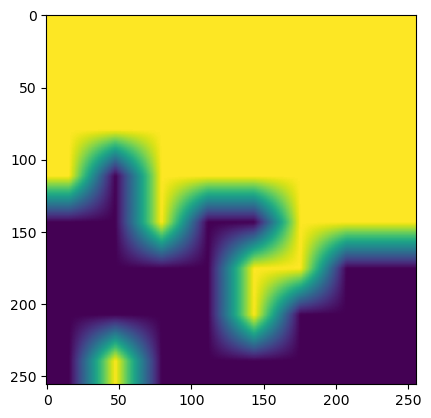

In [8]:
import numpy as np
import cv2

# Convert norms to uint8 type and normalize the pixel values
norms = cv2.normalize(norms, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Apply Otsu's thresholding
_, feature_image = cv2.threshold(norms, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

feature_image = cv2.resize(feature_image,(256,256))

# Save feature image
cv2.imwrite('E:/S4/Project/Main Project/images/new_feature_image.jpg', feature_image)
print(feature_image)
import matplotlib.pyplot as plt
plt.imshow(feature_image)
plt.show()

In [9]:
from Crypto.Util import number
from Crypto.Random import get_random_bytes
import cv2
import numpy as np

# Load logo image
logo_image = cv2.imread('E:/S4/Project/Main Project/images/12.jpg')

# Get the size of the image
height, width, _ = logo_image.shape

# Generate two random bitmaps of the same size as the logo image
key_size = height * width
key1 = number.getRandomNBitInteger(key_size)
key2 = key1 ^ number.getRandomNBitInteger(key_size)
bitmap1 = np.unpackbits(np.frombuffer(key1.to_bytes((key_size + 7) // 8, byteorder='big'), dtype=np.uint8))
bitmap2 = np.unpackbits(np.frombuffer(key2.to_bytes((key_size + 7) // 8, byteorder='big'), dtype=np.uint8))
bitmap1 = bitmap1[:height*width].reshape(height, width)
bitmap2 = bitmap2[:height*width].reshape(height, width)

# Generate two shared images using non-extended visual cryptography
shared1 = cv2.merge((cv2.bitwise_and(logo_image[:,:,0], bitmap1 * 255), cv2.bitwise_and(logo_image[:,:,1], bitmap1 * 255), cv2.bitwise_and(logo_image[:,:,2], bitmap1 * 255)))
shared2 = cv2.merge((cv2.bitwise_and(logo_image[:,:,0], bitmap2 * 255), cv2.bitwise_and(logo_image[:,:,1], bitmap2 * 255), cv2.bitwise_and(logo_image[:,:,2], bitmap2 * 255)))

# Save shared images
cv2.imwrite('E:/S4/Project/Main Project/images/new_shared1.jpg', shared1)
cv2.imwrite('E:/S4/Project/Main Project/images/new_shared2.jpg', shared2)

True

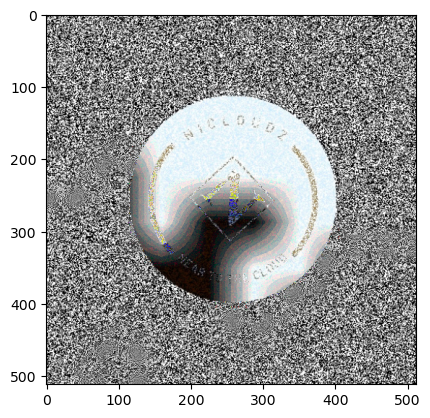

In [10]:
import numpy as np
import cv2

# Load feature image
feature_image = cv2.imread('E:/S4/Project/Main Project/images/new_feature_image.jpg')

# Obtain binary representation of feature image
feature_image_bin = np.unpackbits(feature_image)

# Load shared images
shared2 = cv2.imread('E:/S4/Project/Main Project/images/new_shared2.jpg')

# # Perform XOR operation on the binary representation of the feature image and the shared images
# shared2_reshaped = shared2.reshape(-1, 1)[:feature_image_bin.size].reshape(feature_image_bin.shape)

feature_image = cv2.resize(feature_image, (512, 512))
shared2 = cv2.resize(shared2, (512, 512))

# zero_watermark = cv2.bitwise_xor(feature_image_bin, shared2_reshaped)
zero_watermark = cv2.bitwise_xor(feature_image, shared2)

# Reshape and save zero-watermark image
# zero_watermark = zero_watermark.reshape(feature_image.shape)
cv2.imwrite('E:/S4/Project/Main Project/images/new_zero_watermark.jpg', zero_watermark)
import matplotlib.pyplot as plt
plt.imshow(zero_watermark)
plt.show()

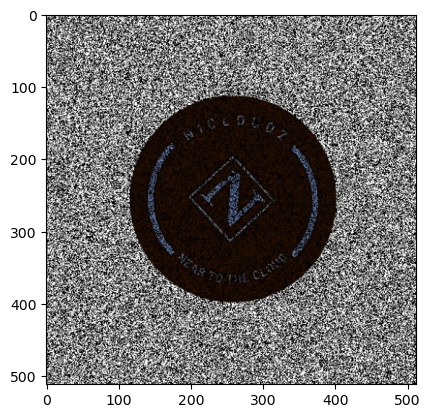

In [11]:
import numpy as np

feature_image = cv2.resize(feature_image, (512, 512))
zero_watermark = cv2.resize(zero_watermark, (512, 512))

# Perform XOR operation on the binary representation of the feature image and the zero-watermark image
recovered_shared2 = cv2.bitwise_xor(feature_image, zero_watermark)

# Reshape and save verification image
recovered_shared2 = cv2.resize(recovered_shared2,(512,512))
cv2.imwrite('E:/S4/Project/Main Project/images/recovered_shared2.jpg', recovered_shared2)
import matplotlib.pyplot as plt
plt.imshow(recovered_shared2)
plt.show()

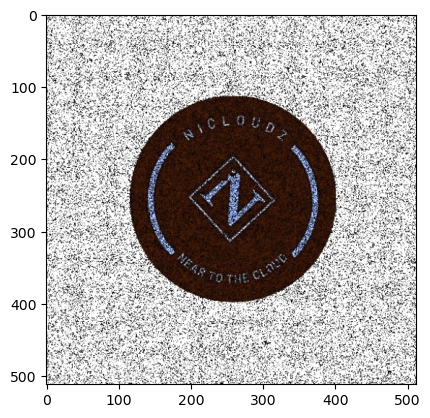

In [12]:
import cv2
import numpy as np

# Load the recovered shared image
shared1 = cv2.imread('E:/S4/Project/Main Project/images/new_shared1.jpg')
recovered_shared2 = cv2.imread('E:/S4/Project/Main Project/images/recovered_shared2.jpg')

# Resize the images to the same size
shared1 = cv2.resize(shared1, (512, 512))
recovered_shared2 = cv2.resize(recovered_shared2, (512, 512))

# Add the shared images
superimposed_recovered = cv2.add(shared1, recovered_shared2)

# Save the superimposed image
cv2.imwrite('E:/S4/Project/Main Project/images/superimposed_recovered.jpg', superimposed_recovered)
import matplotlib.pyplot as plt
plt.imshow(superimposed_recovered)
plt.show()

cv2.destroyAllWindows()